## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.getcwd()

'C:\\Users\\rja59\\Practice'

In [6]:
os.chdir(r'E:\R1j1s5k1r1n\Udemy\Python\Practice')

## Import dataset

In [7]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [8]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
## Checking for missing values

In [9]:
df.isnull().any() 

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [11]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [12]:
# Renaming certain columns for better readability

In [13]:
df = df.rename(columns={'creatinine_phosphokinase': 'creatinine',
                        'ejection_fraction': 'ejection',
                        'DEATH_EVENT': 'death'})

In [14]:
df.shape

(299, 13)

In [16]:
# Checking the data type of each column


In [17]:
df.dtypes

age                    float64
anaemia                  int64
creatinine               int64
diabetes                 int64
ejection                 int64
high_blood_pressure      int64
platelets              float64
serum_creatinine       float64
serum_sodium             int64
sex                      int64
smoking                  int64
time                     int64
death                    int64
dtype: object

In [19]:
## Comparing death(1) and survival(0) rate

In [22]:
death_rate = df.death.value_counts()/299
death_rate

0    0.67893
1    0.32107
Name: death, dtype: float64

Around 68% survived, compared to 32% who died from heart failure

In [26]:
corr = df.corr()
corr = (corr)
corr

,age,anaemia,creatinine,diabetes,ejection,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

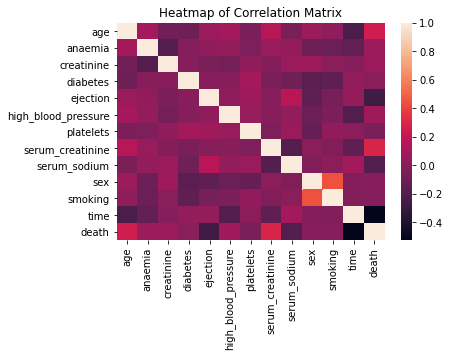

In [28]:
sns.heatmap(corr)
plt.title('Heatmap of Correlation Matrix')


Death has a positive correlation with age and serum creatinine; death has a negative correlation with ejection fraction, serum sodium, and time. Weak correlation with other factors.

## Anaemia vs Death

Text(0.5, 1.0, 'Anaemia Death Distribution')

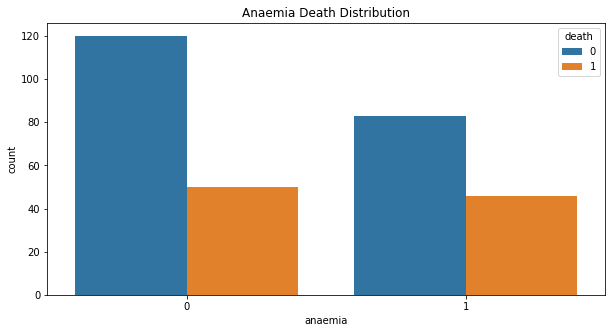

In [31]:
plt.subplots(figsize=(10, 5))
sns.countplot(x="anaemia", hue='death', data=df).set_title('Anaemia Death Distribution')

## Age vs Death

Text(0.5, 1.0, 'Age Distribution - Death V.S. Survival')

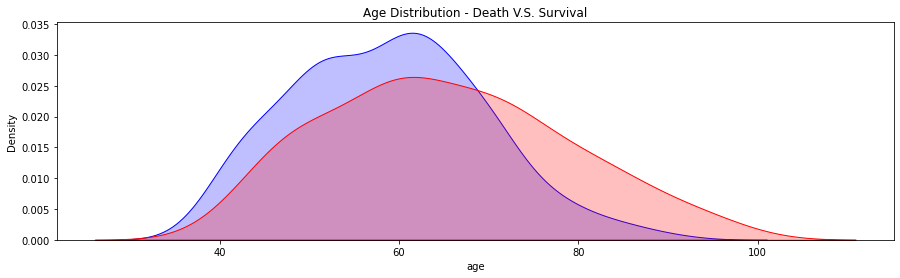

In [32]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['death'] == 0),'age'] , color='b',shade=True,label='survived')
ax=sns.kdeplot(df.loc[(df['death'] == 1),'age'] , color='r',shade=True, label='died')
plt.title('Age Distribution - Death V.S. Survival')

Greater rate of survival for patients in the 40-60 age range, as compared to 60-100.

## Ejection Fraction vs Death

Text(0.5, 1.0, 'Ejection Distribution - Death V.S. Survival')

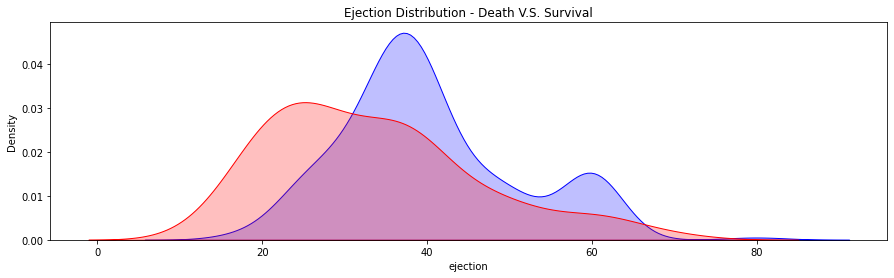

In [33]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['death'] == 0),'ejection'] , color='b',shade=True,label='survived')
ax=sns.kdeplot(df.loc[(df['death'] == 1),'ejection'] , color='r',shade=True, label='died')
plt.title('Ejection Distribution - Death V.S. Survival')

## Serum Creatinine vs Death

Text(0.5, 1.0, 'Serum Creatinine Distribution - Death V.S. Survival')

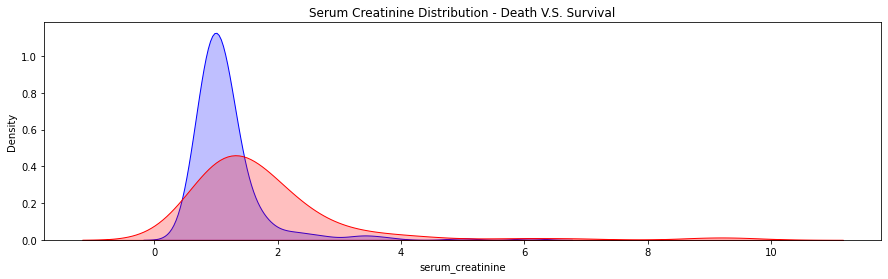

In [47]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['death'] == 0),'serum_creatinine'] , color='b',shade=True,label='survived')
ax=sns.kdeplot(df.loc[(df['death'] == 1),'serum_creatinine'] , color='r',shade=True, label='died')
plt.title('Serum Creatinine Distribution - Death V.S. Survival')

## Serum Sodium vs Death

Text(0.5, 1.0, 'Serum Sodium Distribution - Death V.S. Survival')

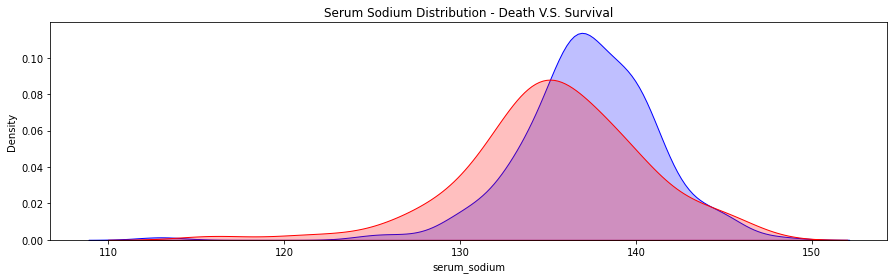

In [49]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['death'] == 0),'serum_sodium'] , color='b',shade=True,label='survived')
ax=sns.kdeplot(df.loc[(df['death'] == 1),'serum_sodium'] , color='r',shade=True, label='died')
plt.title('Serum Sodium Distribution - Death V.S. Survival')

## Time vs Death

Text(0.5, 1.0, 'Time Distribution - Death V.S. Survival')

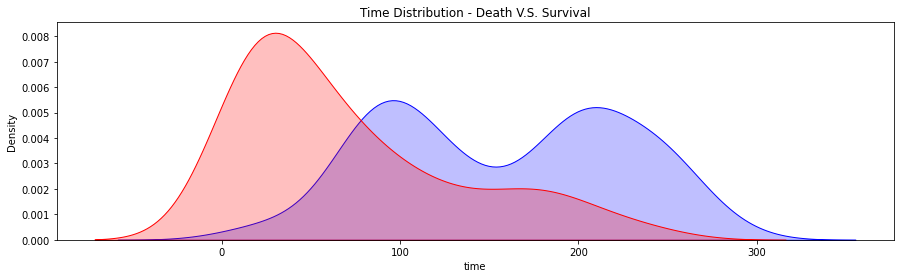

In [51]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['death'] == 0),'time'] , color='b',shade=True,label='survived')
ax=sns.kdeplot(df.loc[(df['death'] == 1),'time'] , color='r',shade=True, label='died')
plt.title('Time Distribution - Death V.S. Survival')

Patients with a shorter follow-up period were more prone to death.